In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')
print(df.head())

# 2. Apply KMeans & DBSCAN, plot clusters (Annual Income vs Spending Score)
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# DBSCAN
dbscan = DBSCAN(eps=11, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

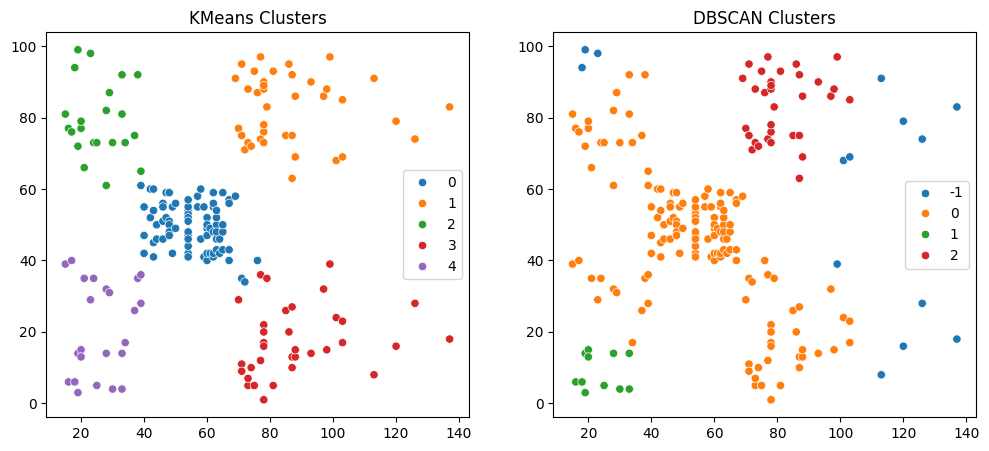

In [5]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=kmeans_labels, palette='tab10')
plt.title('KMeans Clusters')

# Plot DBSCAN clusters
plt.subplot(1,2,2)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=dbscan_labels, palette='tab10')
plt.title('DBSCAN Clusters')
plt.show()

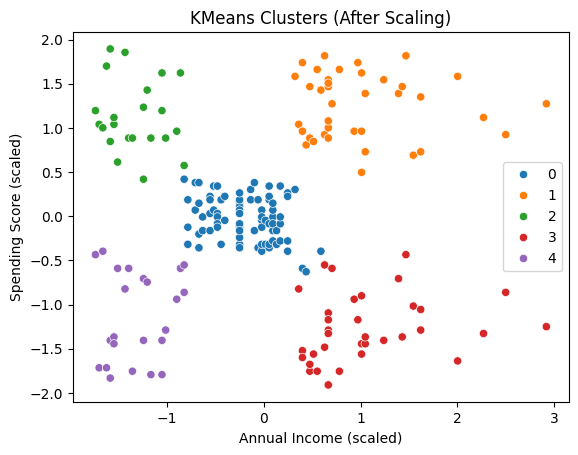

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans_scaled = KMeans(n_clusters=5, random_state=42)
kmeans_scaled_labels = kmeans_scaled.fit_predict(X_scaled)

plt.figure()
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=kmeans_scaled_labels, palette='tab10')
plt.title('KMeans Clusters (After Scaling)')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

In [7]:
print("Cluster assignments (unscaled):", np.bincount(kmeans_labels))
print("Cluster assignments (scaled):", np.bincount(kmeans_scaled_labels))

Cluster assignments (unscaled): [81 39 22 35 23]
Cluster assignments (scaled): [81 39 22 35 23]


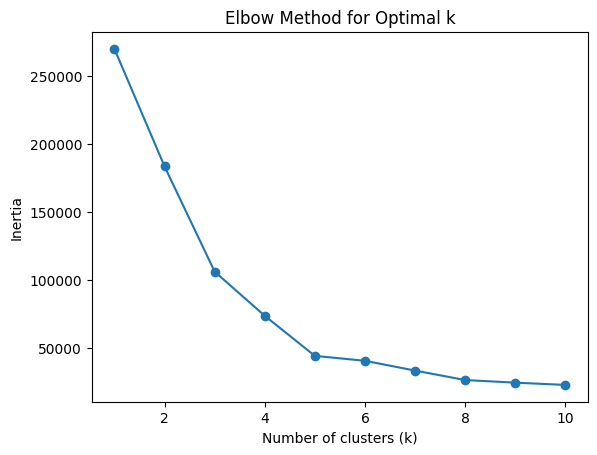

In [8]:
inertia = []
K_range = range(1,11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.figure()
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()